Predict who possible Defaulters are for the Consumer Loans Product

“To come up with a model that predicts the level of financial risk of an individual in terms of Target variable, Risk_Flag using the demographics, employment and financial characteristics of the said individual.”

Context:
In most cases, financial institutions are compelled to or have to examine the risk associated with every individual when giving loans, credit cards or any other financial products. Detecting high risk individuals is necessary to assist in averting financial risk and defaults. This dataset would seem to exhibit several factors like income, profession, number of years with a current job and present car ownership that would be useful in predicting whether an individual’s perceived ranking would be termed as low or high risk status.

Objective:
The main aim is to deploy a classification model that can accurately allocate two classes high-risk (1) and low-risk (0) individuals based on the set features in relation to the true mechanism of class level determination.

Tasks:
Data Preprocessing: The task will include removal of noise from the dataset and preparing the dataset in a proper order. The datasets will also be checked for categorical values, missing values and outliers where necessary.

Exploratory Data Analysis (EDA): This will seek to examine the distributions of the features and their relationships with the majority of these being towards the Risk_Flag variable.

Feature Engineering: Extraction and generation of novel variables that could potentially increase the probability of success for the model in terms of prediction power.

Model Building: An appropriate classification algorithm must be developed and applied to predict Risk_Flag. Logistic regression, decision trees and gradient boosting are common algorithms that could get enhanced to predict this type of outcome.

Evaluation: The model can be measured for its accuracy, precision, recall and some other reliable metrics in evaluation of such models.

Insights and Recommendations: Explain the variables responsible for financial risk and recommend how risk management can be carried out based on the findings from the model.

Based on this approach, financial institutions will be able to use better judgment in credit risk evaluation.

This dataset appears to follow personal financial and demographic information with a risk flag. Here is a quick rundown of each column:

Id: Identifier for each individual.

Income: Annual income in currency units.

Age: Age of the individual.

Experience: Years of professional experience.

Married/Single: Marital status.

House_Ownership: Whether the individual owns or rents their house.

Car_Ownership: Whether the individual owns a car.

Profession: Occupation of the individual.

CITY: City of residence.

STATE: State of residence.

CURRENT_JOB_YRS: Years in the current job.

CURRENT_HOUSE_YRS: Years in the current house.

Risk_Flag: Shows risk level (0 or 1) – probably associated with credit risk or default probability.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
df1 = pd.read_csv('/content/Training_Data[1].csv')
df1

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [ ]:
df1.isnull().sum()

,0
Id,0
Income,0
Age,0
Experience,0
Married/Single,0
House_Ownership,0
Car_Ownership,0
Profession,0
CITY,0
STATE,0


array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Experience'}>,
        <Axes: title={'center': 'CURRENT_JOB_YRS'}>,
        <Axes: title={'center': 'CURRENT_HOUSE_YRS'}>],
       [<Axes: title={'center': 'Risk_Flag'}>, <Axes: >, <Axes: >]],
      dtype=object)

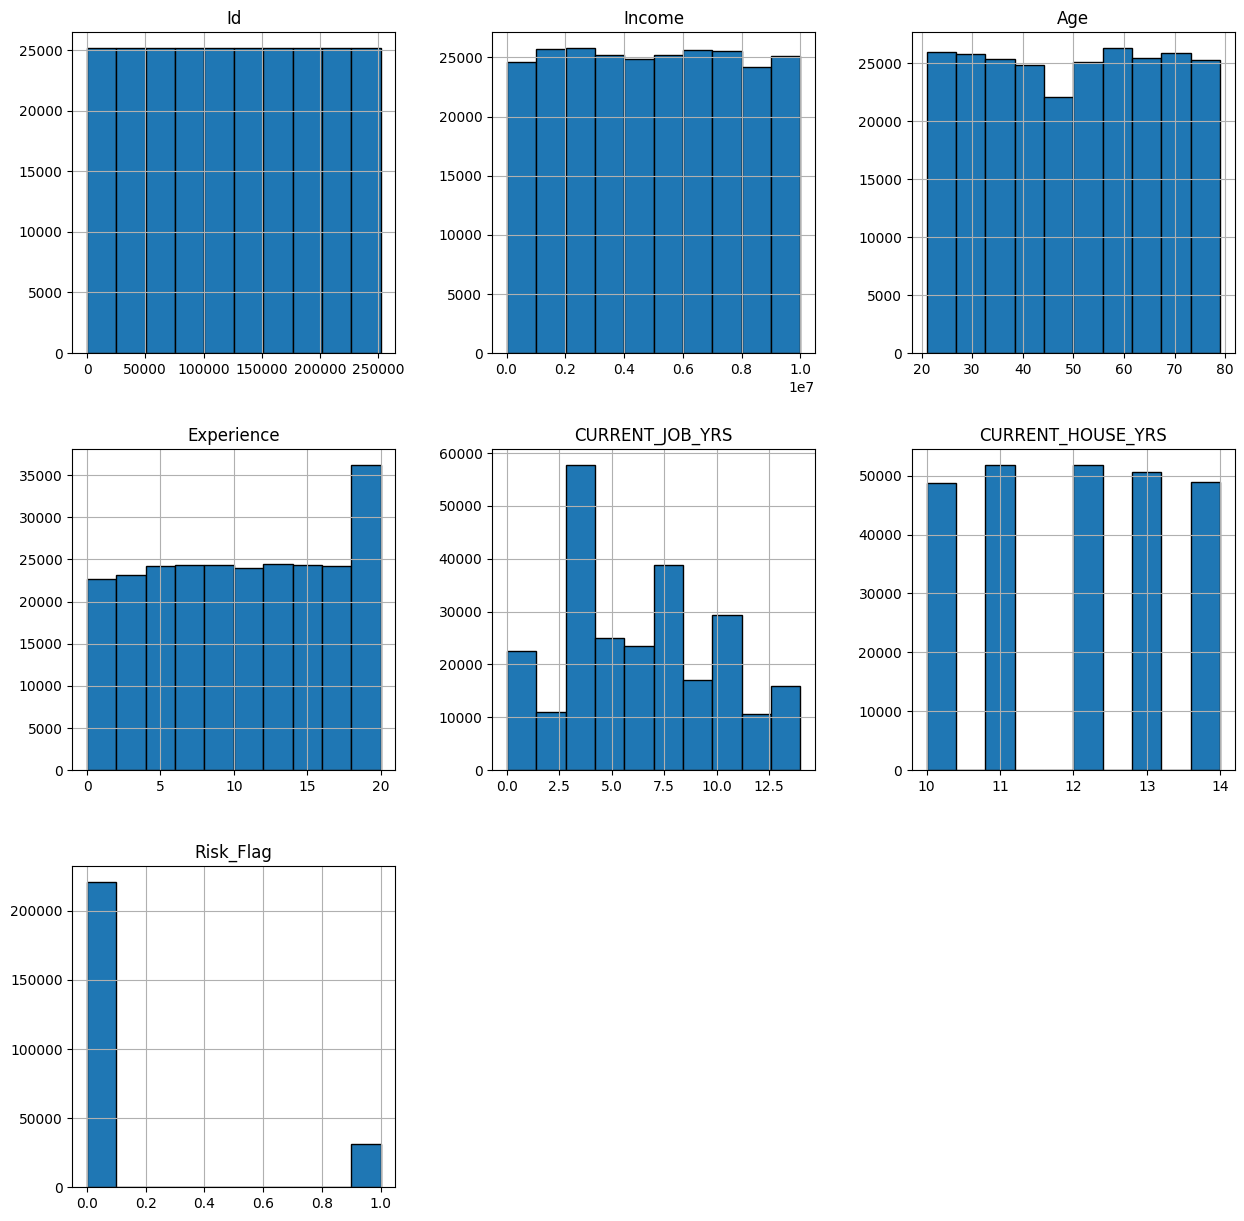

In [ ]:
df1.hist(edgecolor='black',figsize=(15,15))

In [ ]:
df1.duplicated().sum()

0

In [ ]:
df1.shape

(252000, 13)

In [ ]:
df1.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


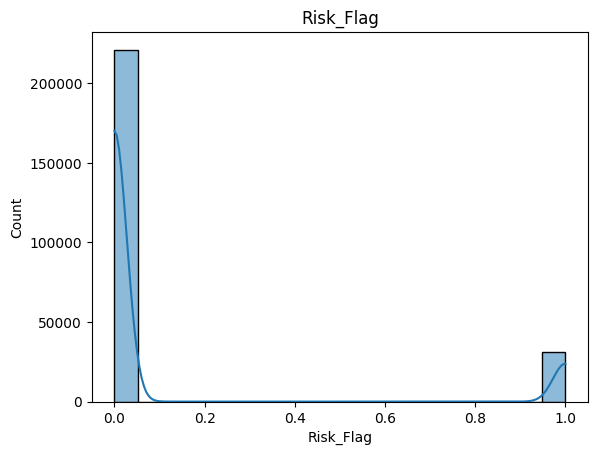

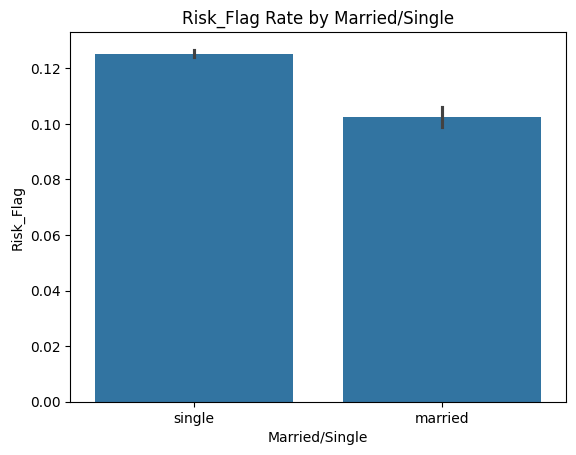

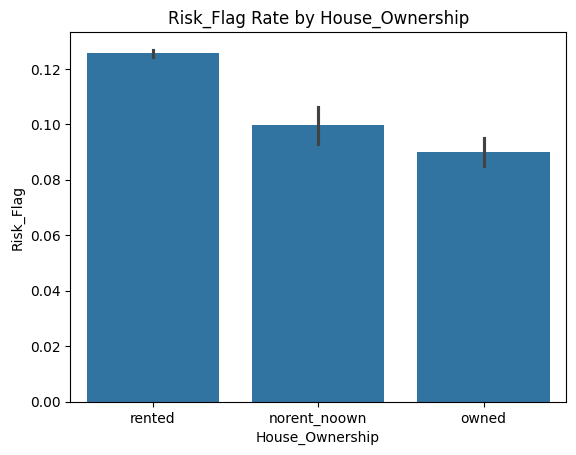

In [ ]:

sns.histplot(df1['Risk_Flag'], kde=True)
plt.title('Risk_Flag')
plt.show()

sns.barplot(x='Married/Single', y='Risk_Flag', data=df1)
plt.title('Risk_Flag Rate by Married/Single')
plt.show()

sns.barplot(x='House_Ownership', y='Risk_Flag', data=df1)
plt.title('Risk_Flag Rate by House_Ownership')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
labelencoder = LabelEncoder()

In [ ]:
df1['Married/Single'] = labelencoder.fit_transform(df1['Married/Single'])
df1['House_Ownership'] = labelencoder.fit_transform(df1['House_Ownership'])
df1['Car_Ownership'] = labelencoder.fit_transform(df1['Car_Ownership'])
df1['Profession'] = labelencoder.fit_transform(df1['Profession'])
df1['CITY'] = labelencoder.fit_transform(df1['CITY'])
df1['STATE'] = labelencoder.fit_transform(df1['STATE'])

In [ ]:
df1

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,1,2,0,33,251,13,3,13,0
1,2,7574516,40,10,1,2,0,43,227,14,9,13,0
2,3,3991815,66,4,0,2,0,47,8,12,4,10,0
3,4,6256451,41,2,1,2,1,43,54,17,2,12,1
4,5,5768871,47,11,1,2,0,11,296,22,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,1,2,0,45,162,28,6,11,0
251996,251997,2843572,26,10,1,2,0,3,251,13,6,11,0
251997,251998,4522448,46,7,1,2,0,17,144,14,7,12,0
251998,251999,6507128,45,0,1,2,0,27,233,18,0,10,0


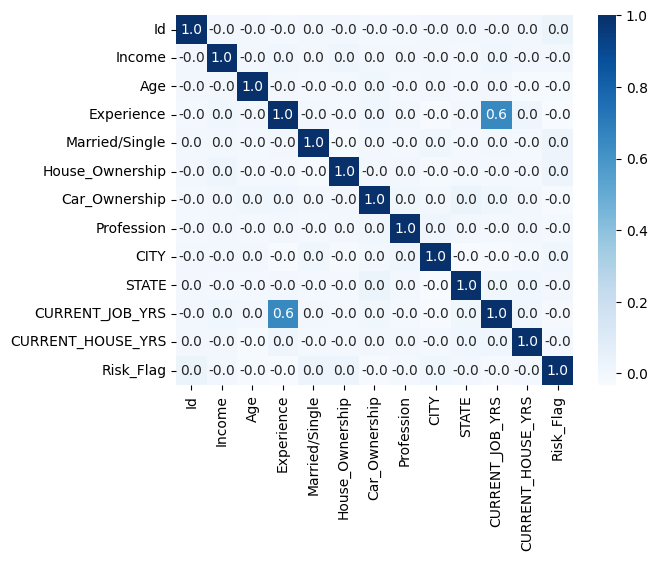

In [ ]:
corr_matrix=df1.corr()
corr_matrix
sns.heatmap(corr_matrix,annot=True,fmt='0.01f',robust=True,cmap='Blues')
plt.show()

In [ ]:
corr_matrix

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Id,1.000000,-0.001324,-0.001816,-0.005810,0.001134,-0.002583,-0.004313,-0.005734,-0.000972,0.002012,-0.003250,0.001972,0.032153
Income,-0.001324,1.000000,-0.000652,0.006422,0.002682,0.016433,0.004068,0.000725,-0.001919,-0.004067,0.007045,-0.002397,-0.003091
Age,-0.001816,-0.000652,1.000000,-0.001118,-0.005323,-0.009820,0.009395,-0.008551,0.002104,-0.004985,0.002154,-0.020134,-0.021809
Experience,-0.005810,0.006422,-0.001118,1.000000,-0.001752,-0.007912,0.007519,0.000975,-0.025703,-0.001251,0.646098,0.019309,-0.034523
Married/Single,0.001134,0.002682,-0.005323,-0.001752,1.000000,-0.022501,0.001206,-0.007534,0.012280,-0.009477,0.004251,-0.007539,0.021092
House_Ownership,-0.002583,0.016433,-0.009820,-0.007912,-0.022501,1.000000,-0.001233,0.001242,-0.014447,-0.007792,-0.009790,-0.005618,0.023622
Car_Ownership,-0.004313,0.004068,0.009395,0.007519,0.001206,-0.001233,1.000000,0.011887,0.001648,0.026000,0.011099,0.000251,-0.024036
Profession,-0.005734,0.000725,-0.008551,0.000975,-0.007534,0.001242,0.011887,1.000000,0.018852,0.001557,-0.004536,0.001954,-0.004900
CITY,-0.000972,-0.001919,0.002104,-0.025703,0.012280,-0.014447,0.001648,0.018852,1.000000,-0.038040,-0.027353,-0.010654,0.004575
STATE,0.002012,-0.004067,-0.004985,-0.001251,-0.009477,-0.007792,0.026000,0.001557,-0.038040,1.000000,0.008745,0.007281,-0.003401


In [ ]:
sor = df1.corr()['Risk_Flag']
sor = sor.sort_values(ascending=False)
sor

,Risk_Flag
Risk_Flag,1.000000
Id,0.032153
House_Ownership,0.023622
Married/Single,0.021092
CITY,0.004575
Income,-0.003091
STATE,-0.003401
CURRENT_HOUSE_YRS,-0.004375
Profession,-0.004900
CURRENT_JOB_YRS,-0.016942


In [ ]:
df1.drop(columns=['CURRENT_JOB_YRS'], inplace=True)
df1.drop(columns=['STATE'], inplace=True)
df1.drop(columns=['CURRENT_HOUSE_YRS'], inplace=True)
df1.drop(columns=['Profession'], inplace=True)
df1.drop(columns=['Income'], inplace=True)
df1.drop(columns=['Id'], inplace=True)

In [ ]:
df1

,Age,Experience,Married/Single,House_Ownership,Car_Ownership,CITY,Risk_Flag
0,23,3,1,2,0,251,0
1,40,10,1,2,0,227,0
2,66,4,0,2,0,8,0
3,41,2,1,2,1,54,1
4,47,11,1,2,0,296,1
...,...,...,...,...,...,...,...
251995,43,13,1,2,0,162,0
251996,26,10,1,2,0,251,0
251997,46,7,1,2,0,144,0
251998,45,0,1,2,0,233,0


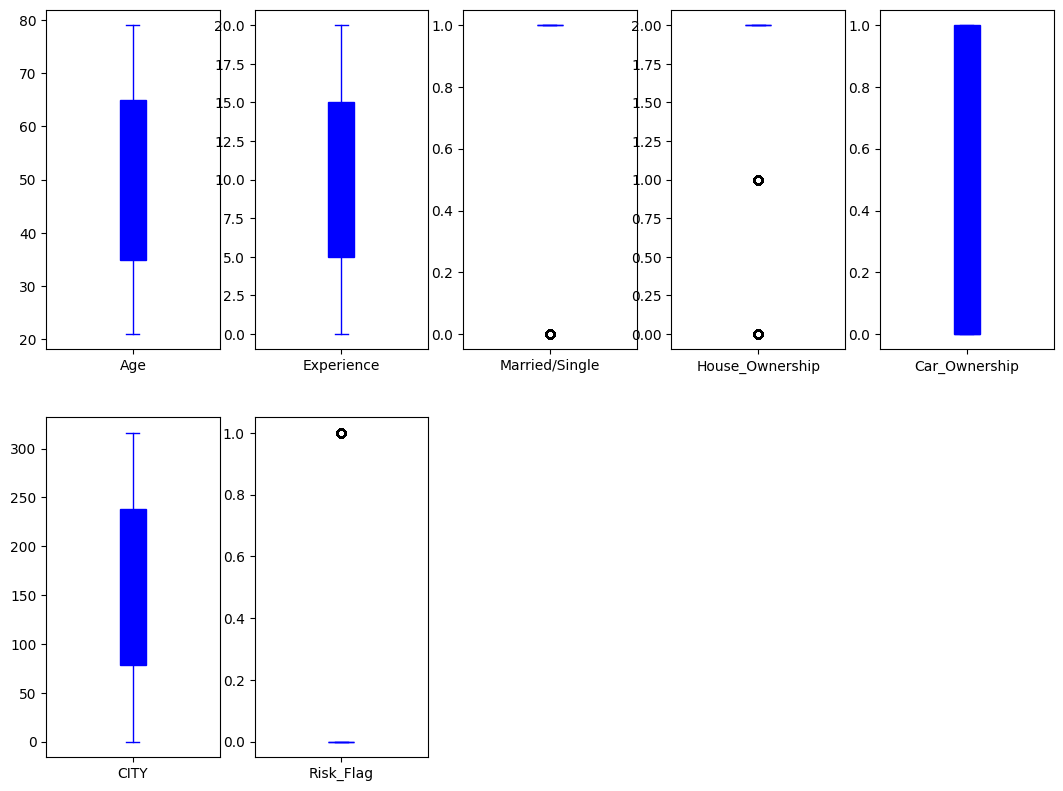

In [ ]:
df1.plot(kind='box',subplots=True,layout=(3,5),figsize=(13,15),color='blue',patch_artist=True)
plt.show()

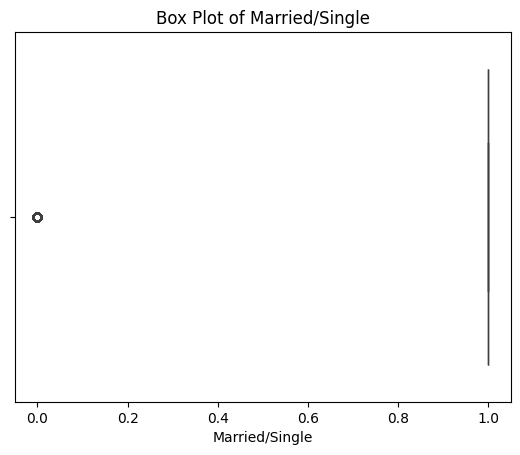

In [ ]:
sns.boxplot(x=df1['Married/Single'])
plt.title('Box Plot of Married/Single')
plt.show()

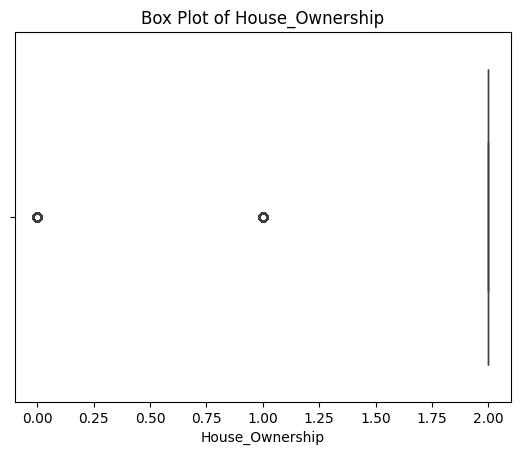

In [ ]:
sns.boxplot(x=df1['House_Ownership'])
plt.title('Box Plot of House_Ownership')
plt.show()

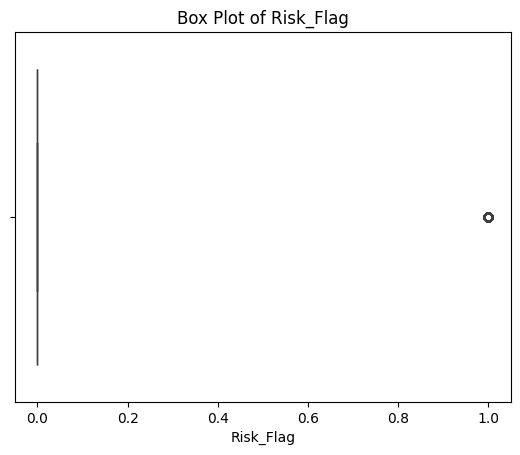

In [ ]:
sns.boxplot(x=df1['Risk_Flag'])
plt.title('Box Plot of Risk_Flag')
plt.show()

             Age  Experience  Married/Single  House_Ownership  Car_Ownership  \
0       3.178054    1.386294        0.693147         1.098612       0.000000   
1       3.713572    2.397895        0.693147         1.098612       0.000000   
2       4.204693    1.609438        0.000000         1.098612       0.000000   
3       3.737670    1.098612        0.693147         1.098612       0.693147   
4       3.871201    2.484907        0.693147         1.098612       0.000000   
...          ...         ...             ...              ...            ...   
251995  3.784190    2.639057        0.693147         1.098612       0.000000   
251996  3.295837    2.397895        0.693147         1.098612       0.000000   
251997  3.850148    2.079442        0.693147         1.098612       0.000000   
251998  3.828641    0.000000        0.693147         1.098612       0.000000   
251999  4.262680    2.890372        0.693147         1.098612       0.000000   

            CITY  Risk_Flag  
0       5

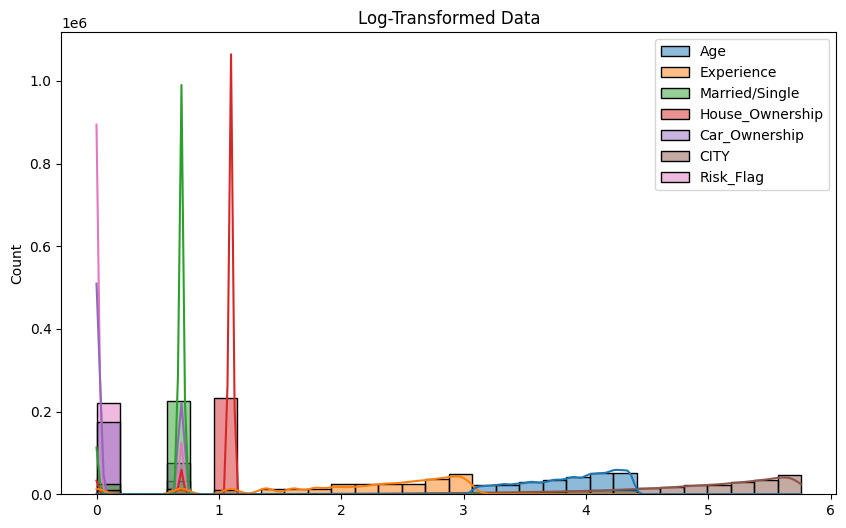

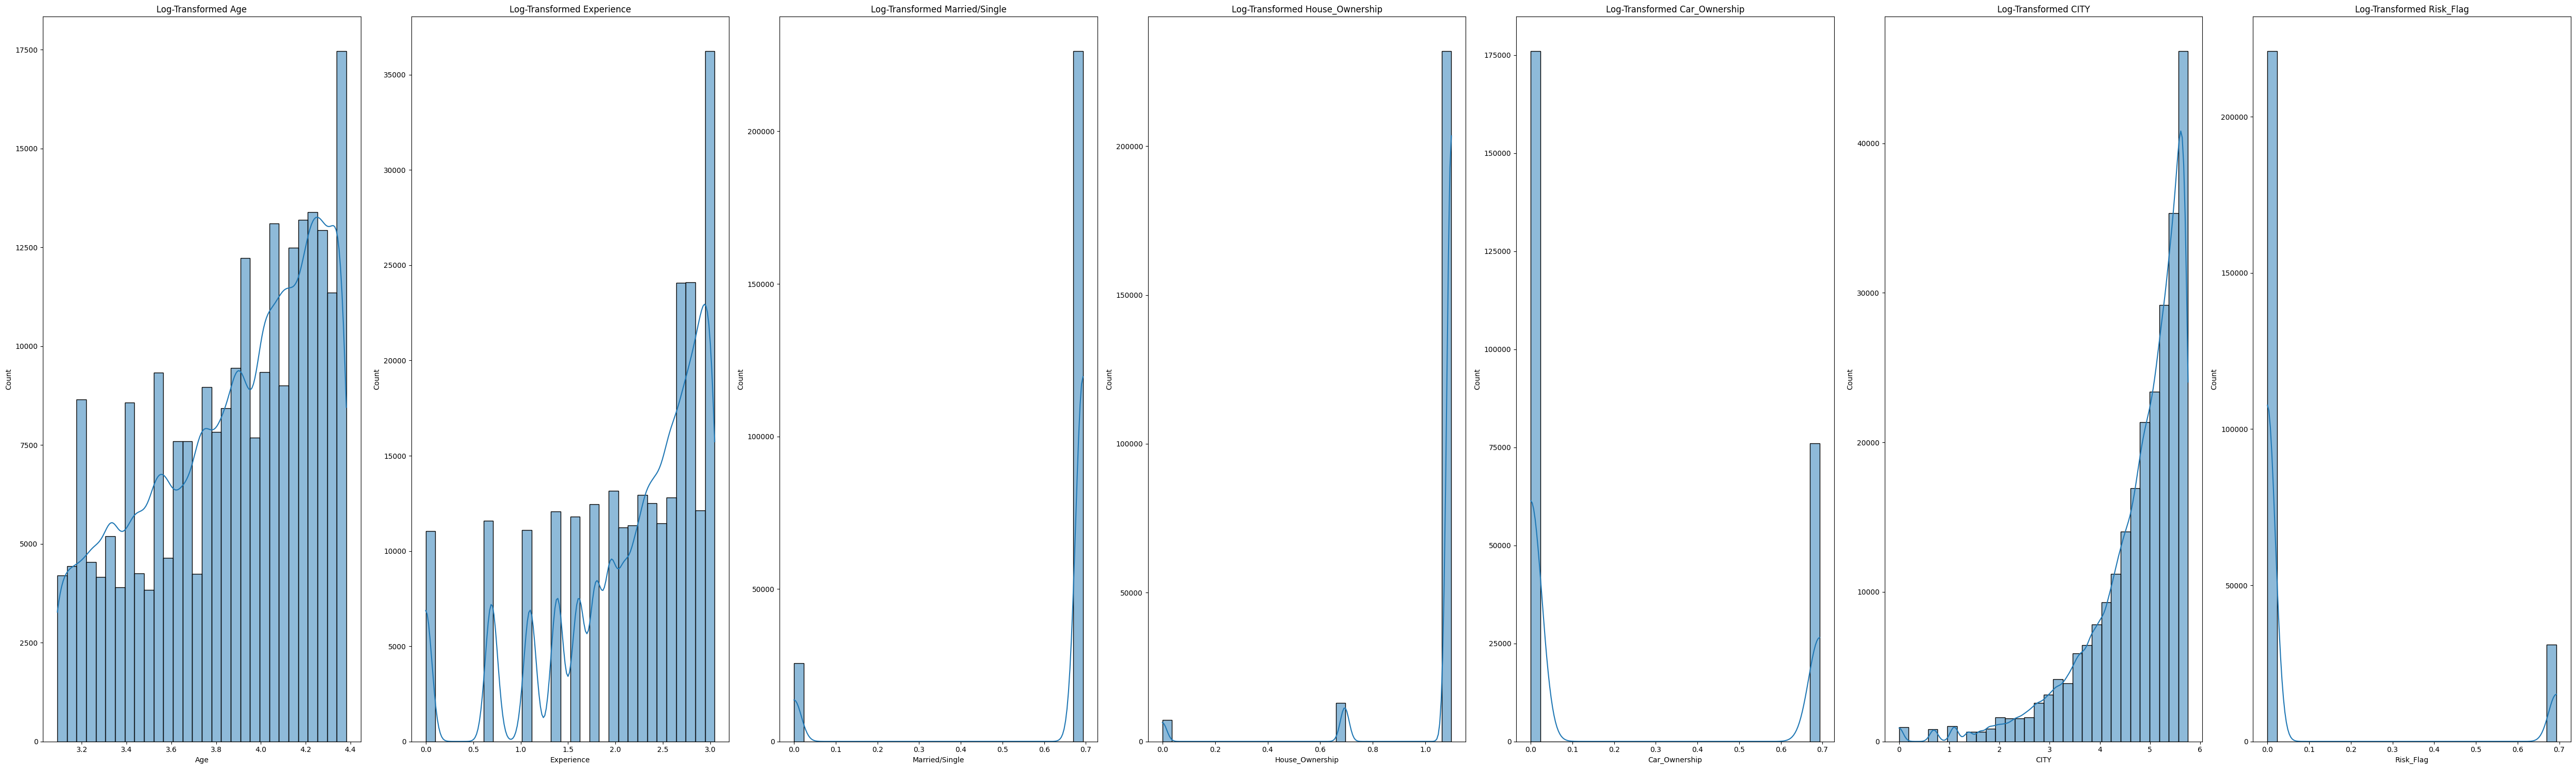

In [ ]:
#To handle skewness
log_data = np.log(df1 + 1)  # Adding 1 to avoid log(0)
print(log_data)

# Plotting log-transformed data distribution
plt.figure(figsize=(10, 6))
sns.histplot(log_data, bins=30, kde=True)
plt.title("Log-Transformed Data")
plt.show()

# Assuming log_data is a DataFrame with multiple features
num_features = log_data.shape[1]  # Number of features
plt.figure(figsize=(50, 15))  # Adjust the figure size as needed

for i, column in enumerate(log_data.columns, 1):
    plt.subplot(1, num_features, i)  # Adjust layout for each feature
    sns.histplot(log_data[column], bins=30, kde=True)
    plt.title(f"Log-Transformed {column}")

plt.tight_layout()
plt.show()


In [ ]:
df1.shape

(252000, 7)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df1.columns

Index(['Age', 'Experience', 'Married/Single', 'House_Ownership',
       'Car_Ownership', 'CITY', 'Risk_Flag'],
      dtype='object')

In [ ]:
independet_feature = ['Age', 'Experience', 'Married/Single', 'House_Ownership','Car_Ownership', 'CITY']
dependet_feature = ['Risk_Flag']
x = df1[independet_feature]
y = df1[dependet_feature]

In [ ]:
# Create and fit the scaler
scaler = StandardScaler()
scaler.fit(x)

# Transform the data
X_scaled = scaler.transform(x)
# X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
# Assuming you have your features in 'X' and target variable in 'y'

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier object
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust hyperparameters

# Train the model
model_rf.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model_rf.predict(x_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
cm

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.8941468253968254


array([[41658,  2489],
       [ 2846,  3407]])

In [ ]:
x

,Age,Experience,Married/Single,House_Ownership,Car_Ownership,CITY
0,23,3,1,2,0,251
1,40,10,1,2,0,227
2,66,4,0,2,0,8
3,41,2,1,2,1,54
4,47,11,1,2,0,296
...,...,...,...,...,...,...
251995,43,13,1,2,0,162
251996,26,10,1,2,0,251
251997,46,7,1,2,0,144
251998,45,0,1,2,0,233


In [ ]:
y

,Risk_Flag
0,0
1,0
2,0
3,1
4,1
...,...
251995,0
251996,0
251997,0
251998,0


In [ ]:
print(X_scaled.shape)
print(X_scaled.shape)
print(y_train.shape)
print(y_test.shape )

(252000, 6)
(252000, 6)
(201600, 1)
(50400, 1)


In [ ]:
# Create an instance of the RandomForestClassifier
model_logistic = RandomForestClassifier()

# Fit the model using x_train and y_train
model_logistic.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [ ]:
y_pred = model_logistic.predict(X_scaled)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
X_scaled

array([[-1.57960351, -1.18023232,  0.33720003,  0.27630373, -0.65712874,
         1.00716661],
       [-0.58334364, -0.01406671,  0.33720003,  0.27630373, -0.65712874,
         0.74686731],
       [ 0.94034792, -1.01363724, -2.96559878,  0.27630373, -0.65712874,
        -1.62836384],
       ...,
       [-0.23172251, -0.51385197,  0.33720003,  0.27630373, -0.65712874,
        -0.15333445],
       [-0.29032603, -1.68001759,  0.33720003,  0.27630373, -0.65712874,
         0.81194213],
       [ 1.17476201,  1.15209891,  0.33720003,  0.27630373, -0.65712874,
        -1.43313936]])

In [ ]:
df1

,Age,Experience,Married/Single,House_Ownership,Car_Ownership,CITY,Risk_Flag
0,23,3,1,2,0,251,0
1,40,10,1,2,0,227,0
2,66,4,0,2,0,8,0
3,41,2,1,2,1,54,1
4,47,11,1,2,0,296,1
...,...,...,...,...,...,...,...
251995,43,13,1,2,0,162,0
251996,26,10,1,2,0,251,0
251997,46,7,1,2,0,144,0
251998,45,0,1,2,0,233,0


In [ ]:
Age = float(input('Age:'))
Experience = float(input('Experience:'))
Married_and_Single = float(input('Married/Single:'))
House_Ownership = float(input('House_Ownership:'))
Car_Ownership = float(input('Car_Ownership:'))
CITY = float(input('CITY:'))
user_input = [[Age,	Experience,	Married_and_Single,	House_Ownership,	Car_Ownership,	CITY]]
std = scaler.transform(user_input)
Risk_Flag = model_logistic.predict(std)
print('The Predicted Risk_Flag:',Risk_Flag)

Age:70
Experience:17
Married/Single:1
House_Ownership:2
Car_Ownership:0
CITY:26
The Predicted Risk_Flag: [0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
